In [4]:
from scipy.spatial import distance as distance
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import colorgram
import os
import matplotlib.colors as mcolor
import pandas as pd
import numpy as np
from ast import literal_eval
dir = os.getcwd()

In [8]:
img_url = pd.read_csv(os.path.join(dir,r'directed_tagged_image_url.csv'), index_col = 0)
palette_tuple = pd.read_csv(os.path.join(dir,r'palette_clean.csv'), index_col = 0)

In [7]:
# first need to convert "location-on-plt" col from string back to list
# this is due to read_csv
location_on_pltt = img_url['location-on-pltt'].apply(literal_eval)
img_url['location-on-pltt'] = location_on_pltt

In [9]:
# do the same for palette_tuple
palette_tuple['RGB1']=palette_tuple['RGB1'].apply(literal_eval)
palette_tuple['RGB2']=palette_tuple['RGB2'].apply(literal_eval)
palette_tuple['RGB3']=palette_tuple['RGB3'].apply(literal_eval)
palette_tuple['RGB4']=palette_tuple['RGB4'].apply(literal_eval)

In [193]:
print(img_url.head(2))
print(palette_tuple.head(2))

                                 RGB1            RGB2             RGB3  \
Up Shore                (2, 146, 183)  (26, 200, 219)  (140, 117, 106)   
Thwarted Summer Shower  (76, 82, 112)  (246, 82, 160)   (54, 238, 224)   

                                   RGB4  
Up Shore                (222, 226, 236)  
Thwarted Summer Shower  (188, 236, 224)  


In [10]:
# write function to convert string back to RGB tuple
def str_to_tupleRGB(string):
    # example: Rgb(r=247, g=245, b=243)
    # replace the "=" with ','; then remove space and ')'
    a = string.replace("=",",").replace(")","").replace(" ","")
    b = a.split(",")
    c = (int(b[1]),int(b[3]),int(b[5]))
    return c

In [12]:
img_url['RGB_x']=img_url["RGB_x"].apply(str_to_tupleRGB)
img_url['RGB_y']=img_url["RGB_y"].apply(str_to_tupleRGB)

In [31]:
print(img_url.head(2))
# export_csv = img_url.to_csv (os.path.join(dir,r'directed_tagged_image_url.csv'), index = True, header=True)

          Unnamed: 0                                                url  \
index                                                                     
Page_1_1           0  https://ak1.ostkcdn.com/images/products/941290...   
Page_1_2           1  https://ak1.ostkcdn.com/images/products/132185...   

                    RGB_x  Proportion_x            RGB_y  Proportion_y  \
index                                                                    
Page_1_1  (247, 245, 243)      0.641295  (183, 153, 126)      0.358705   
Page_1_2  (244, 241, 238)      0.721963  (185, 164, 148)      0.278037   

         location-on-pltt  
index                      
Page_1_1        [1756, 3]  
Page_1_2        [2241, 1]  


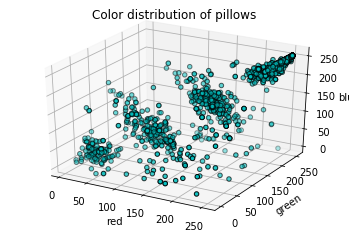

<Figure size 432x288 with 0 Axes>

In [32]:
# first draw a 3D plot to see the distribution of products
# use this to return the 1st item in tuples in a list [i[0] for i in img_url['RGB_x']]
pillow_r =[i[0] for i in img_url['RGB_x']]
pillow_g =[i[1] for i in img_url['RGB_x']]
pillow_b =[i[2] for i in img_url['RGB_x']]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(pillow_r,pillow_g,pillow_b, color='c', edgecolor='k')

ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue') 

ax.set_title('Color distribution of pillows')

plt.show()
plt.clf()

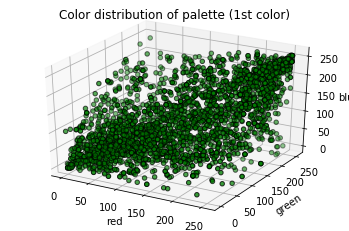

<Figure size 432x288 with 0 Axes>

In [197]:
# first draw a 3D plot to see the distribution of palettes
_r =[i[0] for i in palette_tuple['RGB1']]
_g =[i[1] for i in palette_tuple['RGB1']]
_b =[i[2] for i in palette_tuple['RGB1']]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(_r,_g,_b, color='g', edgecolor='k')

ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue') 

ax.set_title('Color distribution of palette (1st color)')

plt.show()
plt.clf()

In [ ]:
# credit to: https://web.archive.org/web/20100316195057/http://www.dfanning.com/ip_tips/color2gray.html
# credit to: https://stackoverflow.com/questions/1847092/given-an-rgb-value-what-would-be-the-best-way-to-find-the-closest-match-in-the-d
# d = sqrt(((r2-r1)*0.3)^2 + ((g2-g1)*0.59)^2 + ((b2-b1)*0.11)^2)
# Rose_gray = 0.3*Reform(rose[0,*,*]) + 0.59*Reform(rose[1,*,*]) + 0.11*Reform(rose[2,*,*])
# difference in colors is calculated by spatial distance in the 3-D color dimension
# Method 1: Euclidean distance with weights [0.3,0.59,0.11]**2
# Method 2 (try later): Euclidean distance without weights

In [ ]:
# Method 1: Euclidean distance with weights [0.3,0.59,0.11]
# First, find the most similar color to user's choice from all colors in palette database
# if multiple palette colors are pulled return the one with smallest index number
# since palettes are ranked by popularity

In [ ]:
location = []

for i in range(len(img_url.index)):
    u = [img_url['RGB_x'][i][0],img_url['RGB_x'][i][1],img_url['RGB_x'][i][2]]

    def vv(v):
        return distance.euclidean(u, v, [0.3**2, 0.59**2, 0.11**2])

    # return a numpy 2d arrary and then the minimum value
    np_dist = np.array(palette_tuple.applymap(vv))
    minim = np.amin(np_dist)

    # return location of this minimum value and append to previous output
    location.append([np.where(np_dist == minim)[0][0],np.where(np_dist == minim)[1][0]])

In [35]:
# store location in product table
# img_url['location-on-pltt'] = location  
# export_csv = img_url.to_csv (os.path.join(dir,r'directed_tagged_image_url.csv'), index = True, header=True)
# location = img_url['location-on-pltt']

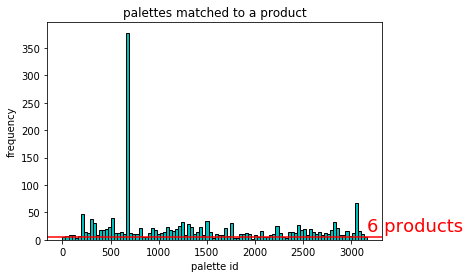

<Figure size 432x288 with 0 Axes>

In [59]:
# see distribution of palettes that match with a product
palette_matched = np.array([i[0] for i in location])

plt.hist(palette_matched, bins= 100, color='c', edgecolor='k')
plt.axhline(y=6, color='r', linestyle='-') 

plt.xlabel('palette id')
plt.ylabel('frequency')
plt.title('palettes matched to a product')
plt.text(3160, 15, '6 products', color='r', size =18)

plt.show()
plt.clf()

In [14]:
# once a product is selected, it traces to a palette
# then find 3 more products that match with the remaining 3 colors in the palette
def getMore(locRGB_loved, palette_tpl, img_RGB):
    # (a) locRGB_loved is the location of the matched color on the palette data, e.g.[1756, 3]
    # (b) palette_tpl is the 4 RGB tuples associated with locRGB_loved
    #       example: [(2, 146, 183) (26, 200, 219) (140, 117, 106) (222, 226, 236)]
    # (c) img_RGB is img_url['RGB_x']
    # when multiple products are matched for the same color, choose the one on top of the img_url list
    # since products are ranked by "Best selling"
    palette = np.delete(np.array(palette_tpl),locRGB_loved[1])  # this is the partial palette with 3 colors left
    loc3more = []
    for i in range(3):
        rgb = palette[i]
        u = [rgb[0],rgb[1],rgb[2]]
        def vv(v):
            return distance.euclidean(u, v, [0.3**2, 0.59**2, 0.11**2])
        # go through all products
        np_dist = np.array(img_RGB.apply(vv))
        minim = np.amin (np_dist)        
        loc3more.append(np.where(np_dist == minim)[0][0])
    return loc3more
    

In [15]:
img_url.head()

,Unnamed: 0,url,RGB_x,Proportion_x,RGB_y,Proportion_y,location-on-pltt,match1,match2,match3,palette_name,position_on_pltt
index,,,,,,,,,,,,
Page_1_1,0,https://ak1.ostkcdn.com/images/products/941290...,"(247, 245, 243)",0.641295,"(183, 153, 126)",0.358705,"[1756, 3]",1215,1352,1514,Afternoon Fast Break,3
Page_1_2,1,https://ak1.ostkcdn.com/images/products/132185...,"(244, 241, 238)",0.721963,"(185, 164, 148)",0.278037,"[2241, 1]",164,1352,828,Rice and Shine,1
Page_1_3,2,https://ak1.ostkcdn.com/images/products/881687...,"(254, 254, 252)",0.830225,"(41, 48, 66)",0.169775,"[3063, 1]",270,381,272,Rustic Bridal Bouquet,1
Page_1_4,3,https://ak1.ostkcdn.com/images/products/662457...,"(169, 159, 146)",0.645881,"(14, 37, 54)",0.354119,"[2890, 0]",381,326,1226,Ash Gothamite,0
Page_1_5,4,https://ak1.ostkcdn.com/images/products/881715...,"(213, 211, 210)",0.578312,"(213, 212, 216)",0.421688,"[950, 0]",365,203,1352,Stirrings of Spring,0


In [22]:
# initiate an empty dataframe
results = pd.DataFrame()

for i in range(img_url.shape[0]):
    results = results.append(
        pd.DataFrame(
            getMore(locRGB_loved = img_url['location-on-pltt'][i], 
                    palette_tpl = palette_tuple.loc[img_url['palette_name'][i]], 
                    img_RGB = img_url['RGB_x'])
        ).T
    )
print(results)    

       0     1     2
0    736  1252  1514
0   1774   784   333
0   1542  1025   558
0   1202   291  1608
0   1025  1286   105
0   1509  1468  1770
0     17  1518   912
0    319   980  1806
0    736  1252  1514
0    329   828   717
0   1202   291  1608
0   1575   619   378
0   1509  1468  1770
0    441  1226  1529
0     71   455  1226
0   1509  1468  1770
0   1666  1763  1180
0    886  1518  1516
0    620   378   463
0    206  1153   173
0   1226   641  1587
0    371  1476   943
0   1040   484   700
0    499  1514   640
0   1109  1474  1320
0    869   659  1414
0   1806   171   272
0   1509  1468  1770
0   1509  1468  1770
0   1806   171   272
..   ...   ...   ...
0    950  1189  1350
0   1587   175  1259
0    589   361   381
0   1202  1509  1770
0   1448   620  1016
0    696  1516  1034
0   1774   784   333
0    531  1398  1446
0   1449   211   123
0   1162  1252   803
0    307  1585  1748
0   1587  1004   809
0   1009   102   895
0   1009   102   895
0    336   102  1034
0    690  121

In [23]:
results.index=img_url.index
results.rename(columns={0: 'match1', 
                       1: 'match2',
                       2: 'match3'}, inplace = True)
export_csv = results.to_csv (os.path.join(dir,r'match_result.csv'), index = True, header=True)

In [42]:
pillow_w_recommendation = img_url.join(results)
# also want to add palette name and position of the product on the palette to product table
palette_name = palette_tuple.index.values[[x[0] for x in location]]
position = [x[1] for x in location]
pillow_w_recommendation['palette_name'] = palette_name
pillow_w_recommendation['position_on_pltt'] = position


In [47]:
pillow_w_recommendation["RGB_x_hex"] = ['#%02x%02x%02x' % i for i in pillow_w_recommendation["RGB_x"]]

In [48]:
export_csv = pillow_w_recommendation.to_csv (os.path.join(dir,r'pillow_w_recommendation.csv'), 
                                             index = True, 
                                             header = True)

Ok stop right here. Below are scratches.

In [45]:
pillow_w_recommendation.head(2)

,Unnamed: 0,url,RGB_x,Proportion_x,RGB_y,Proportion_y,match1,match2,match3,palette_name,position_on_pltt
index,,,,,,,,,,,
Page_1_1,0,https://ak1.ostkcdn.com/images/products/941290...,"(247, 245, 243)",0.641295,"(183, 153, 126)",0.358705,736,1252,1514,Afternoon Fast Break,3
Page_1_2,1,https://ak1.ostkcdn.com/images/products/132185...,"(244, 241, 238)",0.721963,"(185, 164, 148)",0.278037,1774,784,333,Rice and Shine,1


In [180]:
pillows=pillow_w_recommendation

In [185]:
pillow_folder = os.path.join('static', 'Pillow_img')
locate_trio = pillows.loc[ pillows.index.values [0], ['match1','match2','match3']].values.tolist()
names_trio = pillows.index.values [locate_trio].tolist()
path_trio = {os.path.join(pillow_folder,x) for x in names_trio}

In [186]:
path_trio

{'static/Pillow_img/Page_21_16',
 'static/Pillow_img/Page_23_33',
 'static/Pillow_img/Page_26_15'}